In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
tables = inspector.get_table_names()
tables

['measurement', 'station']

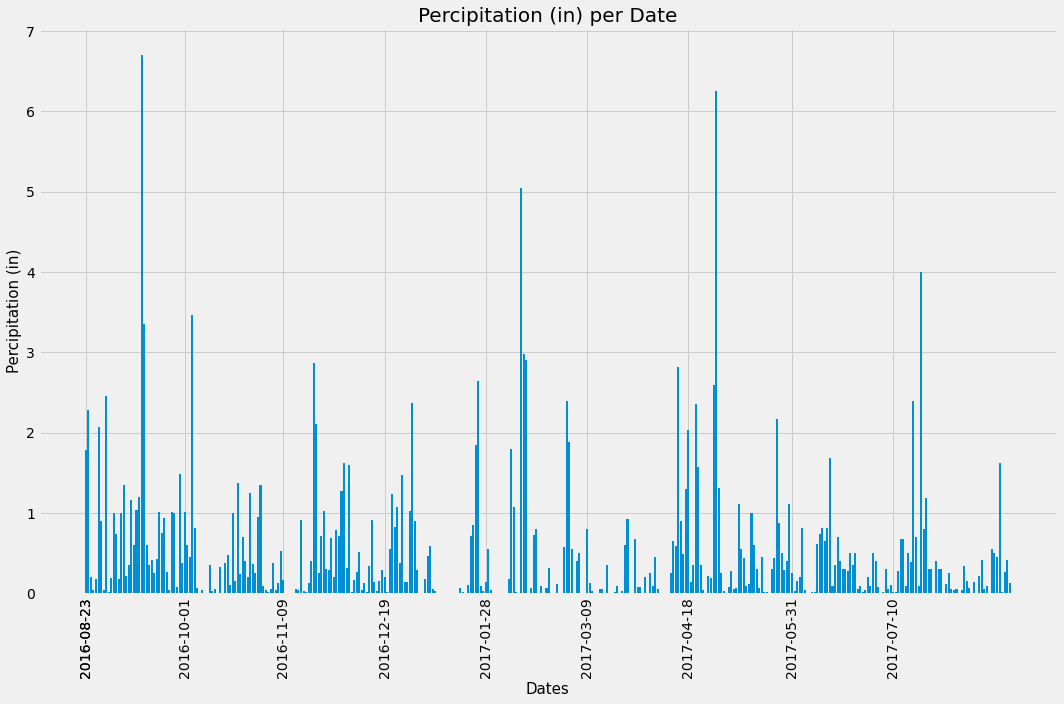

In [15]:
query = """select * 
from 
    'measurement' m 
where
    m.date between '2016-08-23'AND '2017-08-23'"""
conn = engine.connect()

measure_df = pd.read_sql(query, con=conn)
conn.close()
measure_df.set_index('date', inplace=True, )
measure_df.sort_index(ascending=True)

plt.figure(figsize=(15,10))
plt.bar(measure_df.index,measure_df.prcp)

x = ['2016-08-23','2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09',
     '2017-04-18','2017-05-31','2017-07-10']
plt.xticks(x,x,rotation='vertical')
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Percipitation (in)',fontsize=15)
plt.title('Percipitation (in) per Date',fontsize=20)

plt.tight_layout()
path = "images/Percipitation_Date.png"
plt.savefig(path)

plt.show()

In [8]:
measure_df.describe()

,id,prcp,tobs
count,2230.000000,2021.000000,2230.000000
mean,10158.570404,0.177279,74.590583
std,5603.500203,0.461190,4.611667
min,2364.000000,0.000000,58.000000
25%,5287.250000,0.000000,72.000000
50%,8930.500000,0.020000,75.000000
75%,14750.750000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


In [9]:
query = """select
    *
from
        "station" s

"""
conn = engine.connect()

station_df = pd.read_sql(query, con=conn)
conn.close()
print(f" There are {station_df.station.count()} total stations.")
station_df

 There are 9 total stations.


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [10]:
query = """select
    m.station,
    count(m.station)
from
    "measurement" m
group by 
    m.station
order by
    count(m.station) desc;"""

conn = engine.connect()

stationCount_df = pd.read_sql(query, con=conn)
conn.close()
stationCount_df.sort_values(by='count(m.station)',ascending=False)
print(f"Station {stationCount_df.station[0]} has the highest number of observations.")
stationCount_df

Station USC00519281 has the highest number of observations.


,station,count(m.station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [11]:
query = """select
    *
from
    "measurement" m
where
    m.station = "USC00519281"
"""

conn = engine.connect()

tempDf = pd.read_sql(query, con=conn)
conn.close()
print(f"The highest temperature recorded is {tempDf.tobs.max()} degrees(F).")
print(f"The lowest temperature recorded is {tempDf.tobs.min()} degrees(F).")
print(f"The average temperature recorded is {round(tempDf.tobs.mean(),2)} degrees(F).")

The highest temperature recorded is 85.0 degrees(F).
The lowest temperature recorded is 54.0 degrees(F).
The average temperature recorded is 71.66 degrees(F).


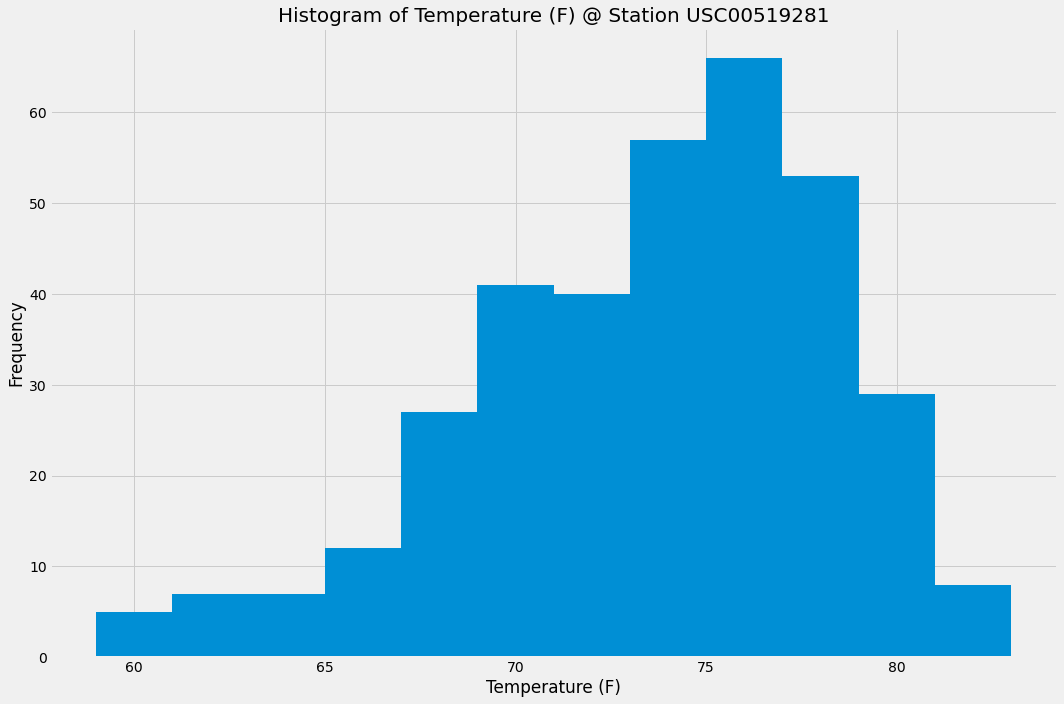

In [16]:
query = """select
    *
from
    "measurement" m
where
    m.station = "USC00519281" AND m.date between '2016-08-23'AND '2017-08-23'
"""
conn = engine.connect()

temp_stat_df = pd.read_sql(query, con=conn)
conn.close()

plt.figure(figsize=(15,10))
plt.hist(temp_stat_df.tobs,bins=12)
plt.title("Histogram of Temperature (F) @ Station USC00519281",fontsize=20)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")

plt.tight_layout()
path = "images/Temp_Histogram.png"
plt.savefig(path)

plt.show()